# **EPIC 2 - DATA UNDERSTANDING**

The following flowchart, taken from the Code Institute's course notes on CRISP-DM, were used to guide the data understanding process:

![data-understanding](../docs/images/data-understanding.png)

## Objectives

- Collect and standardize the dataset of animal images from Kaggle before moving on to epic 3: data preparation.

### Acceptance Criteria
- The dataset should contain images of various species and breeds of animals, as agreed with the client.
- The images should be of sufficient quality and quantity to train the model.

## Tasks
- Download the dataset from Kaggle.
- Explore the dataset to understand its structure and contents.
- Run statistical tests and visualise the dataset.

## Inputs

- Kaggle dataset of animal images.
- Kaggle JSON file for authentication. 

## Outputs

- An image dataset containing sufficient quality and quantity: inputs/datasets.

---

# Set working directory

Check the current working directory:

In [12]:
import os
current_dir = os.getcwd()
print("Current working directory is:", current_dir)

Current working directory is: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


**If required**, run following cell to move to the parent / project root directory.

In [11]:
os.chdir(os.path.dirname(current_dir)) # Change the current working directory to the parent directory
current_dir = os.getcwd() # Get the new current working directory
print("Changing the working directory to parent folder:", current_dir)

Changing the working directory to parent folder: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


#  Collect dataset

First, install kaggle

In [2]:
%pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached bleach-6.1.0-py3-none-any.whl (162 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105119 sha256=c6a5a1b92553f34e8acb38fb8a2f8c35b531e68f1941ae7ca13ae61d2a546ddf
  Stored in directory: /Users/gingermale/Library/Caches/pip/wheels/89/bc/52/0d140fc172783e1e72e3af4dfc13

Change kaggle configuration directory to current working directory and permission of authentication file.

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd() # set environment variable

Set kaggle dataset and download the dataset to root directory.

In [13]:
KaggleDatasetPath = "amandam1/120-dog-breeds-breed-classification"
DestinationFolder = "dataset"
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Dataset URL: https://www.kaggle.com/datasets/amandam1/120-dog-breeds-breed-classification
License(s): CC0-1.0
100%|████████████████████████████████████████| 740M/740M [05:03<00:00, 1.07MB/s]
100%|████████████████████████████████████████| 740M/740M [05:03<00:00, 2.56MB/s]


Unzip downloaded dataset:

In [14]:
! unzip {DestinationFolder}/120-dog-breeds-breed-classification.zip -d {DestinationFolder} \
    && rm {DestinationFolder}/120-dog-breeds-breed-classification.zip

Archive:  dataset/120-dog-breeds-breed-classification.zip
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_10074.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_10131.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_10621.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_1073.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_10976.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11140.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11238.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11258.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11337.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11477.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_1152.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11696.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11818.jpg  
  inflating: dataset/Images/n02085

# Initial data exploration

The dataset was reviewed with the client, who was satisfied that the dataset contained more than enough dog breeds commonly seen during consults.

The dataset was also visually 'sense-checked' for anomalies and none were found.

## Data Cleaning

The function `find_non_images` checks for non-image files in the dataset. To delete these (if any detected), run the `delete_files` function by uncommenting the applicable code.

os.walk is used because it is more efficient than os.listdir, especially for large directories.

PIL is used to check if the file is an image.

In [26]:
import os
from PIL import Image


def find_non_images(directory):
    '''Find files in a directory that are not images.'''

    non_images = {}
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            try:
                img = Image.open(filepath)
                img.verify()
            except (IOError, SyntaxError) as e:
                # If the directory is not already in the dictionary, add it
                if dirpath not in non_images:
                    non_images[dirpath] = []
                non_images[dirpath].append(filepath)
    return non_images


non_images = find_non_images('dataset/images')

if not non_images:
    print("No non-image files detected.")
else:
    for dirpath, files in non_images.items():
        print(f"Directory: {dirpath}")
        print(f"Number of non-image files: {len(files)}")
        for file in files:
            print(f"Non-image file: {file}")


No non-image files detected.


Run the cell below to delete any non-image files detected above.

In [27]:
def delete_files(files_dict):
    ''' Delete a list of files.'''

    for dirpath, files in files_dict.items():
        for file in files:
            print(f"Removing file: {file}")
            os.remove(file)

non_images = find_non_images('dataset/images')
delete_files(non_images)

---

# Visualize the dataset

## Dataset quantity per animal

First, the dataset was visualized to understand the distribution of images across the different animal breeds. The following code uses the [matplotlib library](https://matplotlib.org/).

In [27]:
%pip install matplotlib pillow seaborn pandas

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


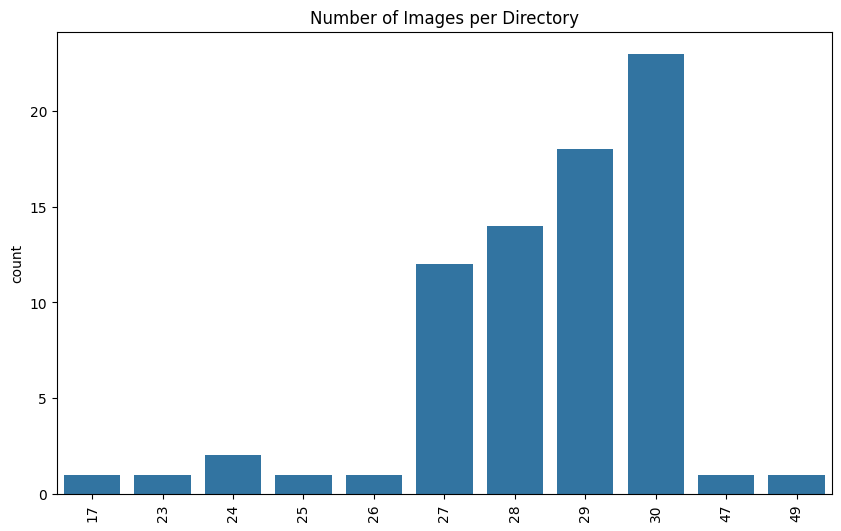

In [10]:
import os
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

def visualize_dataset(directory):
    dir_counts = {}
    image_sizes = []
    image_resolutions = []
    for dirpath, dirnames, filenames in os.walk(directory):
        count = 0
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                count += 1
                file_path = os.path.join(dirpath, filename)
                with Image.open(file_path) as img:
                    width, height = img.size
                    image_sizes.append(width * height)
                    image_resolutions.append((width, height))
        if count > 0:
            dir_counts[dirpath] = count

    # Plot number of images per directory
    plt.figure(figsize=(10, 6))
    sns.countplot(x=list(dir_counts.values()))
    plt.title('Number of Images per Directory')
    plt.xticks(rotation=90)
    plt.show()

visualize_dataset('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

Min = 17 images (Bengal).

Max = 49 images (Labrador Retriever).

Mode = 30 images.

Add axes and explain more.

From this chart, we can AUTOMATICALLY drop images from 47-49, and drop the categories for 17-26.

In [36]:
def print_directories_in_range(directory, min_count, max_count):
    dir_counts = {}
    for dirpath, dirnames, filenames in os.walk(directory):
        count = 0
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                count += 1
        if count > 0:
            dir_counts[dirpath] = count

    # Print directories with image count within the specified range
    for dirpath, count in dir_counts.items():
        if min_count <= count <= max_count:
            print(f"Directory {dirpath} has {count} images")

print_directories_in_range('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset', 17, 26)
print_directories_in_range('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset', 47, 49)


Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Sphynx has 26 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Burmese has 24 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Springer Spaniel has 23 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Prairie Dog has 25 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Bengal has 17 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Persian has 24 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Labrador Retriever has 49 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Golden Retriever has 47 images


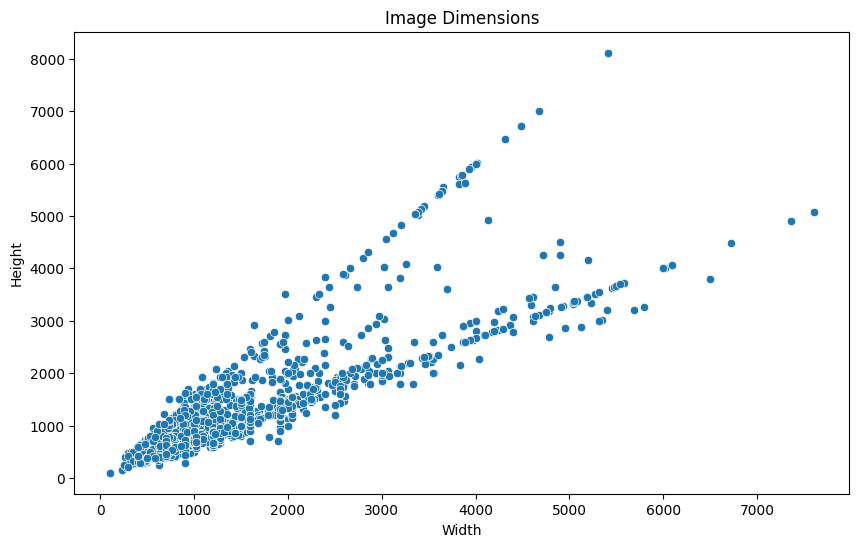

In [5]:
import pandas as pd

def visualize_image_resolutions(directory):
    image_resolutions = []
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(dirpath, filename)
                with Image.open(file_path) as img:
                    width, height = img.size
                    image_resolutions.append((width, height))

    # Convert to DataFrame for easier plotting
    df = pd.DataFrame(image_resolutions, columns=['Width', 'Height'])

    # Plot image dimensions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Width', y='Height', data=df)
    plt.title('Image Dimensions')
    plt.show()

visualize_image_resolutions('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

The minimum resolution is 100 x 100 and is found in the image /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Great Dane/Image_17.jpg


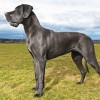

In [47]:
import os
from PIL import Image
from IPython.display import display

def print_min_resolution(directory):
    min_resolution = None
    min_dimensions = None
    min_file = None
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(dirpath, filename)
                with Image.open(file_path) as img:
                    width, height = img.size
                    resolution = width * height
                    if min_resolution is None or resolution < min_resolution:
                        min_resolution = resolution
                        min_dimensions = (width, height)
                        min_file = file_path

    print(f"The minimum resolution is {min_dimensions[0]} x {min_dimensions[1]} and is found in the image {min_file}")

    # Display the image with the minimum resolution
    with Image.open(min_file) as img:
        display(img)

print_min_resolution('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

# Conclusions and Next Steps

**Quality**

The image with the lowest resolution (100x100 pixels) is still visually recognisable as a Great Dane so the dataset is deemed to have sufficient quality to train the model. Before training the model, the images will be resized to 150x150 pixels to improve the model's performance.

**Quantity**

The above findings show unequal numbers of images per animal. The data preparation step will seek to resolve this in two ways:

1. manual imputing of animals highlighted above with fewer than 30 images.

2. Manual removal of Golden Retriever and Labrador Retriever to reduce numbers to around 30 images.

Later, during the modelling step, data augmentation will be used to increase the number of images for each animal up to 50 before training the model.

The next step is to prepare the dataset for training the model in epic 3: data preparation.